# Preamble

This data is sourced at: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process

The silica in ore concentrate is measured every hour. If engineers can access this data beforehand by making predictions, then they will be able to take corrective actions to reduce this impurity. In this notebook, I will be using numerical features to predict a numerical target.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# >0. Load and Clean Data

### Load Raw CSV

In [15]:
df = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")

In [16]:
display(df.head())
print(f"Rows: {df.shape[0]}\nCols: {df.shape[1]}")


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


Rows: 737453
Cols: 24


In [17]:
print(f"Column names:\n{df.columns}")

Column names:
Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

## Check for null values

In [19]:
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

No null values are observed.

In [21]:
cleaned_df = df.drop('date', axis=1)\
            .replace(',','.', regex=True)\
            .apply(pd.to_numeric)
    

In [7]:
display(cleaned_df.dtypes)
display(cleaned_df.head())

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


### Check for Outliers

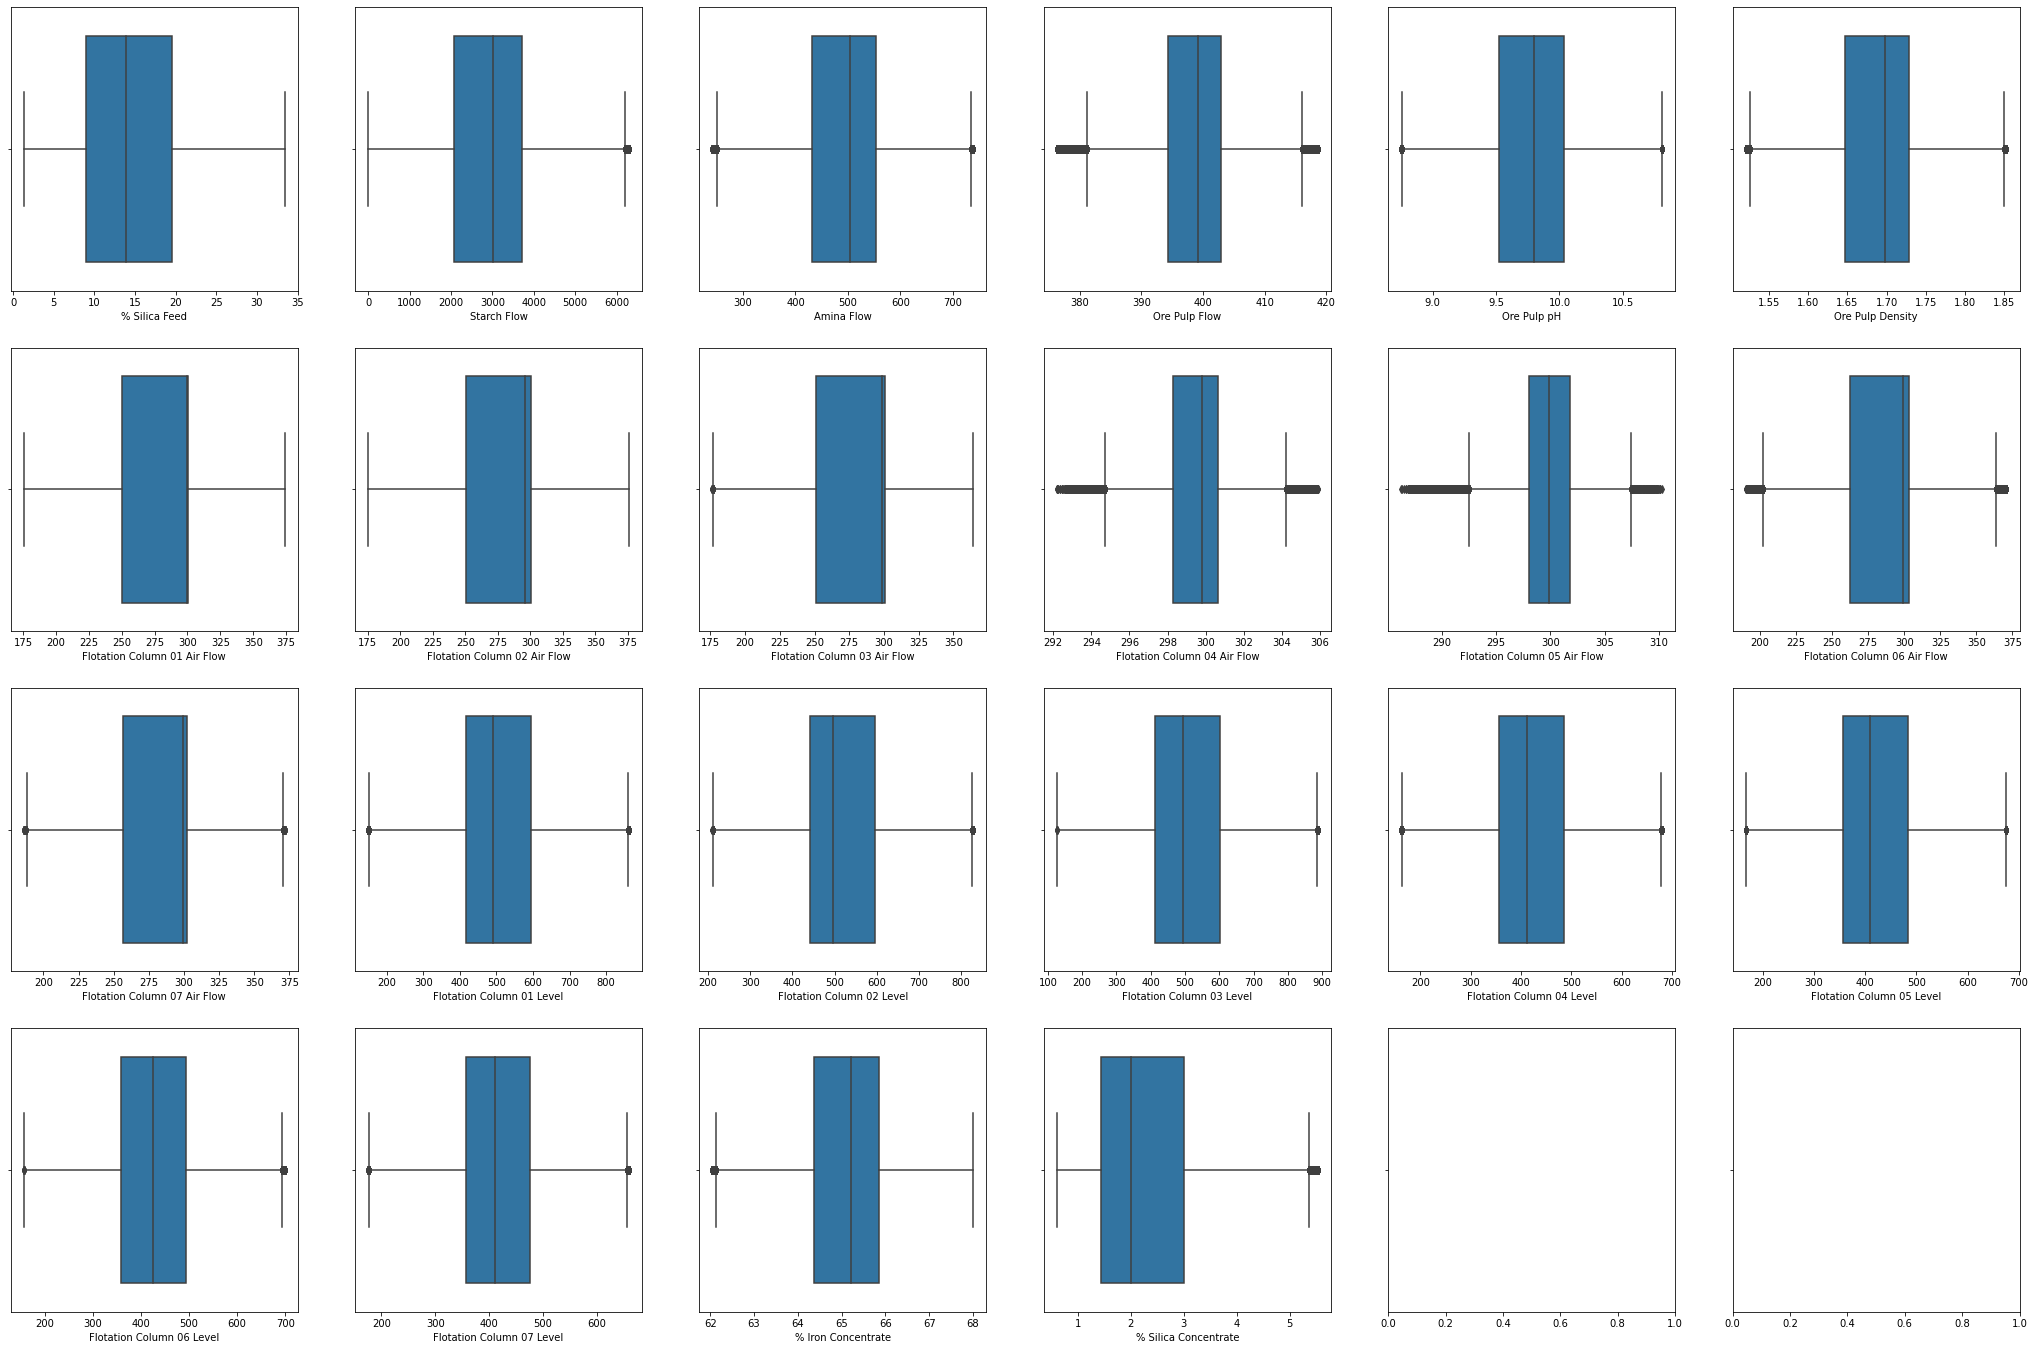

In [43]:
def plot_outliers(df):
    # Get all numeric cols
    numeric_cols = [col for col in df.columns[1:] if pd.api.types.is_numeric_dtype(df[col])]

    # Create grid of boxplots
    num_plots = len(numeric_cols)
    num_rows = int(np.ceil(num_plots / 6))
    fig, axes = plt.subplots(nrows=num_rows, ncols=6, figsize=(36,6 * num_rows), sharey=True)
    axes = axes.flatten()
    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, x=col, ax=axes[i], showfliers=True)

    # Adjust layout
    fig.tight_layout
    plt.show()

plot_outliers(df=cleaned_df)

Significant outliers are not present in the dataset.

### Export Cleaned Data

In [47]:
# Using feather since its much faster than CSV

cleaned_df.to_feather('mining_quality_data.feather')

# 1. Exploratory Data Analysis

### Load Cleaned Data

In [3]:
mining_data = pd.read_feather('mining_quality_data.feather')

mining_data

target_colname = "% Silica Feed"

In [2]:
plt.figure(figsize=(22,22))
heatmap = sns.heatmap(mining_data.corr(), annot=True);
heatmap.set_title("Heatmap of Mining Data", pad=20, fontdict={'fontsize': 20});

NameError: name 'plt' is not defined

In [3]:
correlation = mining_data.corrwith(mining_data[target_colname]).sort_values(ascending=False) # Get correlation values

plt.figure(figsize=(8,12))
target_heatmap = sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm') # Plot with annotations to show values
target_heatmap.set_title("'% Silica Feed' Correlation", pad=15, fontdict={'fontsize': 15});

NameError: name 'mining_data' is not defined

The main variable to consider is the '% Iron Feed'. The Flotation Column Air Flow 5,2,4, 'Ore Puplp Flow', and 'Ore Pulp Density' may be worth considering as they are above 0.1. The other features are irrelevant and they should be considered for exclusion.

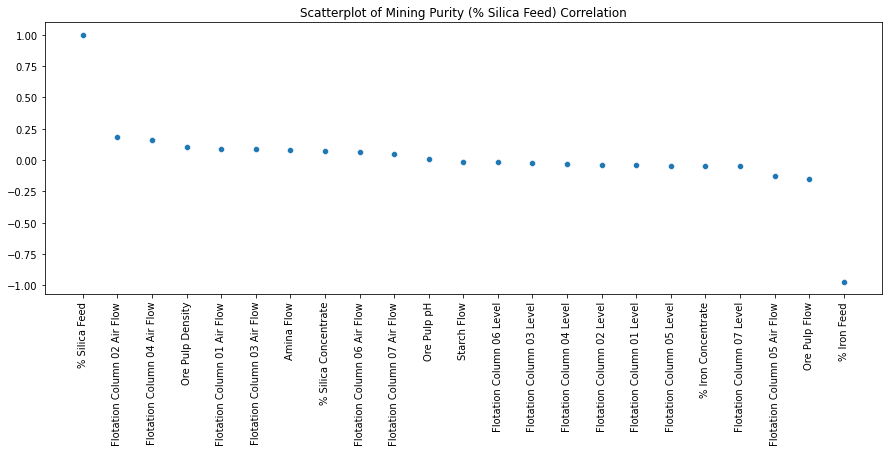

In [73]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=correlation.index, y= correlation.values)
plt.title("Scatterplot of Mining Purity (% Silica Feed) Correlation")
plt.xticks(rotation=90);

# >2. Model Building

In [4]:
selected_features = ['% Iron Feed', 'Flotation Column 02 Air Flow',  'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Ore Pulp Density', 'Ore Pulp Flow']

X = mining_data.drop('% Silica Feed', axis=1)
X_selected = mining_data[selected_features]
y = mining_data['% Silica Feed']

In [6]:
print("Feature, Min, Max, Mean: \n\n")
for i, feature in enumerate(selected_features):
    col = mining_data[feature]
    print(f"{i+1}) {feature}, {col.min()}, {col.max()}, {col.mean()}\n")

Feature, Min, Max, Mean: 


1) % Iron Feed, 42.74, 65.78, 56.29473906811692

2) Flotation Column 02 Air Flow, 175.156, 375.992, 277.1599652228685

3) Flotation Column 04 Air Flow, 292.195, 305.871, 299.4477935583694

4) Flotation Column 05 Air Flow, 286.295, 310.27, 299.91781411764566

5) Ore Pulp Density, 1.51982, 1.85325, 1.6803796856003073

6) Ore Pulp Flow, 376.249, 418.641, 397.57837171046833



## >2.1 Benchmark - Random Forest Regression

In [5]:
def RunRandomForest(X_values, y_values):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size = 0.2, random_state=1)

    # Make Model
    rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=1).fit(X_train, y_train)

    # Get Predictions
    y_pred = rf.predict(X_test)

    # Evaluate
    mse = round(mean_squared_error(y_test, y_pred),4)
    rmse = round(math.sqrt(mse),4)
    r2 = round(r2_score(y_test, y_pred),4)
    print(f"Mean Squared Error: {mse}\nRoot Mean Squared Error: {rmse}\nR2 Score: {r2}")




In [6]:
print("Random Forest With ALL Features:\n")

RunRandomForest(X, y)

Random Forest With ALL Features:



KeyboardInterrupt: 

In [9]:
print("Random Forest With SELECTED Features:\n")

RunRandomForest(X_selected, y)

Random Forest With SELECTED Features:

Mean Squared Error: 1.6519
Root Mean Squared Error: 1.2853
R2 Score: 0.9643


In [24]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=1)
type(rf).__name__

'RandomForestRegressor'

## >2.2 Gradient Boosting Regression

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.1)

In [124]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [23]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=2
)

gbr.fit(X_train_std, y_train)

GradientBoostingRegressor(random_state=2)

In [130]:
y_pred = gbr.predict(X_test_std)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = gbr.score(X_test_std, y_test)
print(f"Mean Squared Error: {mse:.4f}\nRoot Mean Squared Error: {rmse:.4f}\nR2 Score: {r2:.4f}")

Mean Squared Error: 0.6402
Root Mean Squared Error: 0.8001
R2 Score: 0.9861


Compared to the Random Forest Regressor, the Gradient Boost returned better results.

## >2.3 Neural Network

In [15]:
sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=3, test_size=0.2) # Feature selection more important for NN, so using X_selected


In [16]:
# Define the Network
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear') # Linear function for final dense layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
# Standardise the data
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train the model
history = model.fit(X_train_std, y_train, epochs=30, batch_size=32, validation_data=(X_test_std, y_test))

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_std, y_test)

# Make predictions
y_pred = model.predict(X_test_std)

Epoch 1/30
18437/18437 [==============================] - 12s 645us/step - loss: 1.7014 - mae: 0.8053 - val_loss: 0.9813 - val_mae: 0.6675
Epoch 2/30
18437/18437 [==============================] - 12s 643us/step - loss: 0.9737 - mae: 0.6737 - val_loss: 0.9660 - val_mae: 0.6562
Epoch 3/30
18437/18437 [==============================] - 12s 662us/step - loss: 0.9257 - mae: 0.6438 - val_loss: 0.9808 - val_mae: 0.6970
Epoch 4/30
18437/18437 [==============================] - 12s 642us/step - loss: 0.8926 - mae: 0.6242 - val_loss: 0.9072 - val_mae: 0.6306
Epoch 5/30
18437/18437 [==============================] - 12s 667us/step - loss: 0.8714 - mae: 0.6137 - val_loss: 0.8587 - val_mae: 0.6004
Epoch 6/30
18437/18437 [==============================] - 12s 663us/step - loss: 0.8518 - mae: 0.6028 - val_loss: 0.8463 - val_mae: 0.5931
Epoch 7/30
18437/18437 [==============================] - 12s 641us/step - loss: 0.8345 - mae: 0.5943 - val_loss: 0.8291 - val_mae: 0.6017
Epoch 8/30
18437/18437 [===

In [19]:
print(f"Test Mean Squared Error: {test_loss}")
print(f"Test Root Mean Squared Error: {math.sqrt(test_loss):.4f}")
print(f"Test Mean Absolute Error: {test_mae}")

Test Mean Squared Error: 0.6687198281288147
Test Root Mean Squared Error: 0.8178
Test Mean Absolute Error: 0.4844527542591095


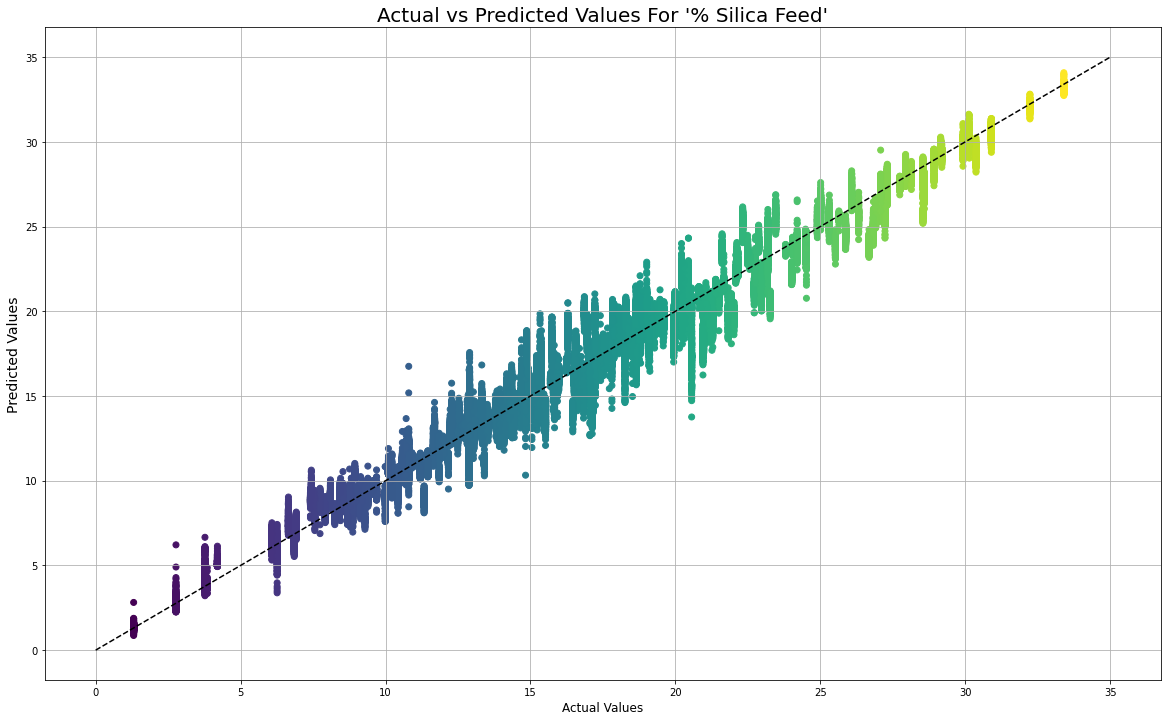

In [21]:
plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred, c=y_test)
plt.plot([0,35],[0,35], color='black', linestyle='--') # Add diagonal line
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Actual vs Predicted Values For '% Silica Feed'", fontsize=20)
plt.grid(True)